In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

In [3]:
aapl_tweets_df = pd.read_csv('Apple-Twitter-Sentiment-DFE.csv')
aapl_tweets_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [4]:
aapl_tweets_df['date'].unique()

array(['Mon Dec 01 19:30:03 +0000 2014', 'Mon Dec 01 19:43:51 +0000 2014',
       'Mon Dec 01 19:50:28 +0000 2014', ...,
       'Tue Dec 09 22:18:27 +0000 2014', 'Tue Dec 09 23:45:59 +0000 2014',
       'Wed Dec 10 00:48:10 +0000 2014'], dtype=object)

In [5]:
stock = pd.read_csv('HistoricalQuotes.csv')
stock.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [6]:
#sep_date=aapl_tweets_df['date']#.astype('datetime64')#.split()
#sep_date

In [7]:
aapl_tweets_df['date'] = pd.to_datetime(aapl_tweets_df['date']).dt.strftime('%m/%d/%Y')
aapl_tweets_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,12/01/2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,12/01/2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,12/09/2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,12/09/2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,12/10/2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [8]:
aapl_tweets_df['date'].unique()

array(['12/01/2014', '12/02/2014', '12/03/2014', '12/04/2014',
       '12/05/2014', '12/06/2014', '12/07/2014', '12/08/2014',
       '12/09/2014', '12/10/2014'], dtype=object)

In [9]:
stock = stock.rename(columns={'Date':'date'} )
stock

,date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [10]:
(stock[stock['date'].unique() == '12/08/2014']).value_counts()

date         Close/Last   Volume    Open     High       Low    
12/08/2014   $112.4      57445030   $114.1   $114.648   $111.62    1
dtype: int64

In [11]:
merged_df = pd.merge(left=aapl_tweets_df, right=stock, how = 'inner', on ='date')
merged_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,Close/Last,Volume,Open,High,Low
0,623495513,True,golden,10,NaN,3,0.6264,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...,$115.07,83657780,$118.81,$119.25,$111.27
1,623495514,True,golden,12,NaN,3,0.8129,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,$115.07,83657780,$118.81,$119.25,$111.27
2,623495515,True,golden,10,NaN,3,1.0000,12/01/2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...,$115.07,83657780,$118.81,$119.25,$111.27
3,623495516,True,golden,17,NaN,3,0.5848,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...,$115.07,83657780,$118.81,$119.25,$111.27
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,12/01/2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,$115.07,83657780,$118.81,$119.25,$111.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,623499442,True,golden,13,NaN,3,0.7757,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...,$114.12,60112240,$110.19,$114.3,$109.35
3363,623499450,True,golden,16,NaN,3,0.6225,12/09/2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...,$114.12,60112240,$110.19,$114.3,$109.35
3364,623499486,True,golden,14,NaN,5,0.9347,12/09/2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...,$114.12,60112240,$110.19,$114.3,$109.35
3365,623517290,True,golden,17,NaN,5,0.8938,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3\nnot_relevant,RT @SwiftKey: We're so excited to be named to ...,$114.12,60112240,$110.19,$114.3,$109.35


In [12]:
merged_df['date'].unique()

array(['12/01/2014', '12/02/2014', '12/03/2014', '12/04/2014',
       '12/05/2014', '12/08/2014', '12/09/2014', '12/10/2014'],
      dtype=object)

In [13]:
from textblob.sentiments import NaiveBayesAnalyzer

In [14]:
def runsent(text):
    blob_object = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob_object.sentiment[0]

In [18]:
merged_df["Sentiment"] = merged_df["text"].map(lambda x: runsent(x))
merged_df["Sentiment"]

0       pos
1       pos
2       neg
3       pos
4       pos
       ... 
3362    pos
3363    pos
3364    pos
3365    pos
3366    neg
Name: Sentiment, Length: 3367, dtype: object

In [19]:
#merged_df
merged_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,Close/Last,Volume,Open,High,Low,Sentiment
0,623495513,True,golden,10,NaN,3,0.6264,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...,$115.07,83657780,$118.81,$119.25,$111.27,pos
1,623495514,True,golden,12,NaN,3,0.8129,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,$115.07,83657780,$118.81,$119.25,$111.27,pos
2,623495515,True,golden,10,NaN,3,1.0000,12/01/2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...,$115.07,83657780,$118.81,$119.25,$111.27,neg
3,623495516,True,golden,17,NaN,3,0.5848,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...,$115.07,83657780,$118.81,$119.25,$111.27,pos
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,12/01/2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,$115.07,83657780,$118.81,$119.25,$111.27,pos


In [24]:
import os
path = os.path.join('.','tweets_with_sentiment.csv')
merged_df.to_csv(path)

In [35]:
merged_df_sentiment = pd.read_csv(path)

In [38]:
merged_df_sentiment

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,Close/Last,Volume,Open,High,Low,Sentiment
0,0,623495513,True,golden,10,NaN,3,0.6264,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
1,1,623495514,True,golden,12,NaN,3,0.8129,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
2,2,623495515,True,golden,10,NaN,3,1.0000,12/01/2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...,$115.07,83657780.0,$118.81,$119.25,$111.27,neg
3,3,623495516,True,golden,17,NaN,3,0.5848,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
4,4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,12/01/2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,3362,623499442,True,golden,13,NaN,3,0.7757,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3364,3363,623499450,True,golden,16,NaN,3,0.6225,12/09/2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3365,3364,623499486,True,golden,14,NaN,5,0.9347,12/09/2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3366,3365,623517290,True,golden,17,NaN,5,0.8938,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3\nnot_relevant,RT @SwiftKey: We're so excited to be named to ...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos


In [43]:
merged_df_pos = merged_df_sentiment.loc[merged_df_sentiment["Sentiment"]=="pos"]
merged_df_neg = merged_df_sentiment.loc[merged_df_sentiment["Sentiment"]=="neg"]

In [44]:
merged_df_pos

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,Close/Last,Volume,Open,High,Low,Sentiment
0,0,623495513,True,golden,10,NaN,3,0.6264,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
1,1,623495514,True,golden,12,NaN,3,0.8129,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
3,3,623495516,True,golden,17,NaN,3,0.5848,12/01/2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
4,4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,12/01/2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
5,5,623495518,True,golden,13,NaN,3,0.5975,12/01/2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...,$115.07,83657780.0,$118.81,$119.25,$111.27,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,3361,623499410,False,finalized,3,12/12/14 2:58,1,0.6619,12/09/2014,5.420000e+17,#AAPL OR @Apple,NaN,hey @apple is it normal for my laptop charger ...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3363,3362,623499442,True,golden,13,NaN,3,0.7757,12/09/2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3364,3363,623499450,True,golden,16,NaN,3,0.6225,12/09/2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos
3365,3364,623499486,True,golden,14,NaN,5,0.9347,12/09/2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...,$114.12,60112240.0,$110.19,$114.3,$109.35,pos


TypeError: 'value' must be an instance of str or bytes, not a float

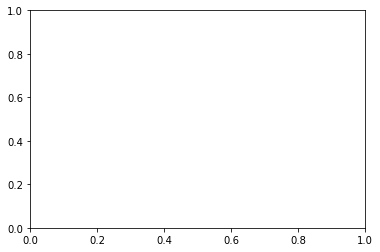

In [56]:
#plt.hist(merged_df_sentiment['Sentiment'])

In [51]:
blob_object = TextBlob(merged_df_sentiment['text'].item(), analyzer=NaiveBayesAnalyzer())

ValueError: can only convert an array of size 1 to a Python scalar

In [45]:
type(merged_df_sentiment['text'][0])

str

In [46]:
merged_df_sentiment['text'][5]

'#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS'

In [48]:
blob_object = TextBlob(merged_df_sentiment['text'][5], analyzer=NaiveBayesAnalyzer())

In [49]:
analysis = blob_object.sentiment
print(analysis)

Sentiment(classification='pos', p_pos=0.9792839291655753, p_neg=0.020716070834423925)


In [50]:
analysis[0]

'pos'